<h1> <center> Analysis of electricity demand of five states in Australia

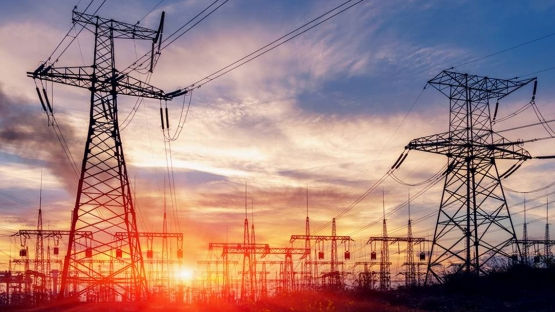

## Import packages

In [ ]:
#import pac:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import plotly.figure_factory as ff
import folium
from plotly.subplots import make_subplots

## Data cleaning and Data Preparation

In [ ]:
df_elec = pd.read_csv("C:\\Users\\acer\\OneDrive\\DataDisca\\16_10_2021 Task 01\\electricity1.txt", header = None)
df_elec

In [ ]:
df_elec = df_elec.transpose() 
df_elec

In [ ]:
df_elec.to_csv('C:\\Users\\acer\\OneDrive\\DataDisca\\16_10_2021 Task 01\\electricity.csv')  

In [ ]:
df_elec = pd.read_csv("C:\\Users\\acer\\OneDrive\\DataDisca\\16_10_2021 Task 01\\df_elec.csv")
df_elec

In [ ]:
df_elec.info()

In [ ]:
df_elec.describe()

.

****

## Summary Table 

|<center>Field Name|<center>Description|<center>Pandas Data Type|<center>Data Scale|<center>Max Value|<center>Min Value|<center>Missing Value Count|
|---------------|--------------------|---------------|--------------------|--------------------|---------------|--------------------|
|NSW|New South Wales|float64	|230735|3498.385270	|3498.385270|non|
|
|VIC|Victoria|float64	|230735|9494.010992	|2688.516606|non|
|
|QUN|Queensland|float64	|230735|7514.436522	|2008.623448|non|
|
|SA|South Australia|float64	|230735|3182.476646|488.835380|non|
|
|TAS|Tasmania|float64	|230735|1093.502130|-233.906816|non|

********

Data set has five (5) column and two hundred thirty thousand seven hundred and thirty-five (230,735) rows. Also data set has lot of unique values.

.

## Visualization

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_elec.NSW, name='NSW', marker_color = 'indianred'))
fig.add_trace(go.Box(y=df_elec.VIC, name = 'VIC', marker_color = 'goldenrod'))
fig.add_trace(go.Box(y=df_elec.QUN, name='QUN', marker_color = 'royalblue'))
fig.add_trace(go.Box(y=df_elec.SA, name = 'SA', marker_color = '#FF851B'))
fig.add_trace(go.Box(y=df_elec.TAS, name = 'TAS', marker_color = '#3D9970'))
fig.show()

The descriptive statistics are graphically visualized by Above boxplots.<br> Clearly show by box plots that NSW and TAS states have the highest and lowest average demand respectively and VIC and QUN states's average demanda are nearly close.

In [ ]:
colors = ['indianred', 'goldenrod', 'royalblue', '#FF851B','#3D9970']
fig1 = px.line(df_elec, labels=dict(value = "Demand", index ="Time (half hour)"), color_discrete_sequence= colors)
fig1.show()

Above graph shows that the variation of demand of each cities with time. data variation shows that some sesonal patten.

In [ ]:
# Use `hole` to create a donut-like pie chart

fig2 = go.Figure(data=[go.Pie(labels=['NSW','VIC', 'QUN ', 'SA', 'TAS' ], 
                             values=[df_elec.NSW.sum(), df_elec.VIC.sum(), df_elec.QUN.sum(), df_elec.SA.sum(),df_elec.TAS.sum()], hole=.4)])
colors = ['indianred', 'goldenrod', 'royalblue', '#FF851B','#3D9970']
fig2.update_traces( marker=dict(colors= colors))
fig2.show()

This pie chart show that total electricity demand of stydy period. 

In [ ]:
fig = go.Figure()
fig = make_subplots(rows=3, cols=2)

fig.add_trace(go.Histogram(x=df_elec['NSW'], name = "NSW") ,1, 1)
fig.add_vline(x=np.mean(df_elec['NSW']), line_width=3, line_dash="dash", row =1, col = 1)

fig.add_trace(go.Histogram(x=df_elec['VIC'], name = "VIC") ,1, 2)
fig.add_vline(x=np.mean(df_elec['VIC']), line_width=3, line_dash="dash",  row =1, col = 2)

fig.add_trace(go.Histogram(x=df_elec['QUN'], name = "QUN"), 2, 1)
fig.add_vline(x=np.mean(df_elec['QUN']), line_width=3, line_dash="dash",  row =2, col = 1)

fig.add_trace(go.Histogram(x=df_elec['SA'], name = "SA"),2, 2)
fig.add_vline(x=np.mean(df_elec['SA']), line_width=3, line_dash="dash", row =2, col = 2)

fig.add_trace(go.Histogram(x=df_elec['TAS'], name = "TAS") ,3, 1)
fig.add_vline(x=np.mean(df_elec['TAS']), line_width=3, line_dash="dash", row =3, col = 1)

# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

Above graphs shows the histogram of the demand of each states.

In [ ]:
df_st = pd.DataFrame(np.array([['Victoria', int(df_elec.VIC.sum()) , -6.4281,3.4219], ['New South Wales', int(df_elec.NSW.sum()),31.2532, -146.9211], ['Queensland',int(df_elec.QUN.sum()), -22.5752, 144.0848], ['Tasmania', int(df_elec.TAS.sum()), -42.0409, 146.8087], ['South Australia',int(df_elec.SA.sum()), -30.0002, 136.2092]]),
                   columns=['states', 'demand', 'lat', 'lon'])
df_st
#Victoria, New South Wales, Queensland, Tasmania and South Australia.

In [ ]:
df_st['demand'] = df_st.demand.astype(int)
df_st['lat'] = df_st.lat.astype(float)
df_st['lon'] = df_st.lon.astype(float)

In [ ]:
df_st.info()

In [ ]:
df_st = pd.DataFrame(np.array([['Victoria', int(df_elec.VIC.sum()) , -36.9848,143.3906], ['New South Wales', int(df_elec.NSW.sum()),-31.2532, 146.9211], ['Queensland',int(df_elec.QUN.sum()), -22.5752, 144.0848], ['Tasmania', int(df_elec.TAS.sum()), -42.0409, 146.8087], ['South Australia',int(df_elec.SA.sum()), -30.0002, 136.2092]]),
                   columns=['states', 'demand', 'lat', 'lon'])
df_st
#Victoria, New South Wales, Queensland, Tasmania and South Australia.

In [ ]:
df_st['text'] = df_st['states'] + '<br> Demand ' + (df_st['demand']).astype(str)
df_st

In [ ]:
df_st['demand'] = df_st.demand.astype(int)
df_st['lat'] = df_st.lat.astype(float)
df_st['lon'] = df_st.lon.astype(float)

In [ ]:
df_st.info()

In [ ]:
df_st

In [ ]:
colors = ["royalblue","crimson","lightseagreen","orange","indianred"]

fig = go.Figure()
    
fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_st['lon'],
        lat = df_st['lat'],
        text = df_st['text'],
        marker = dict(size = df_st['demand']*0.000003, color = colors, line_color='rgb(40,40,40)', line_width=0.5, sizemode = 'area')
)
             )

fig.update_layout(
        title_text = 'The half hourly electricity demand of five states in Australia<br>bubol size represent the total demand of each states.<br>(Click legend to toggle traces)',
        geo = dict(
            scope = 'world',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

In [ ]:
corr_pearson = df_elec.corr(method='pearson', min_periods=1)
corr_pearson

In [ ]:
corr_spearman = df_elec.corr(method="spearman")
corr_spearman 

In [ ]:
fig = go.Figure(data=go.Heatmap(z= np.array(corr_pearson), x= ['NSW','VIC', 'QUN ', 'SA', 'TAS' ], y= ['NSW','VIC', 'QUN ', 'SA', 'TAS' ], colorscale='Viridis'))
fig.update_layout(title='Annotated Heatmaps (pearson)', xaxis_nticks=36)
fig.show()

In [ ]:
fig = go.Figure(data=go.Heatmap(z= np.array(corr_spearman), x= ['NSW','VIC', 'QUN ', 'SA', 'TAS' ], y= ['NSW','VIC', 'QUN ', 'SA', 'TAS' ]))
fig.update_layout(title='Annotated Heatmaps (spearman)', xaxis_nticks=36)
fig.show()

Acoording to earson and Spearman correlation matrices we can conclude following conclutions: 
- There is high co relation between  (NSV and VIC), (SA and VIC)
- There is low co relation between  (TAS and QUN), (TAS and SA)

In [ ]:
map1 = folium.Map(location = [-24.1500, 133.2500],zoom_start =4)
folium.Marker(location = [-36.9848 ,143.3906], popup = "Victoria",tooltip = "Victoria<br> Demand 1070372221").add_to(map1)
folium.Marker(location = [-31.2532, 146.9211], popup = 'New South Wales',tooltip = "New South Wales<br> Demand 1555273890", icon = folium.Icon(color = 'red')).add_to(map1)
folium.Marker(location = [-22.5752, 144.0848], popup = 'Queensland' ,tooltip = 'Queensland<br> Demand 995846893', icon = folium.Icon(color = 'yellow')).add_to(map1)
folium.Marker(location = [-42.0409, 146.8087,], popup = 'Tasmania', tooltip = "Tasmania<br> Demand 117029120", icon = folium.Icon(color = 'orange')).add_to(map1)
folium.Marker(location = [-30.0002, 136.2092], popup = 'South Australia',tooltip = "South Australia<br> Demand 297801199", icon = folium.Icon(color = 'green')).add_to(map1)
folium.Marker(location = [-33.8688, 151.2093], popup = "Sydney",tooltip = "Sydney <br>City in Australia", icon = folium.features.CustomIcon("C://Users//acer//OneDrive//DataDisca//16_10_2021 Task 01//sydny.png", icon_size =(100,100)) ).add_to(map1)
folium.Marker(location = [-31.9523, 115.8613], popup = "Perch",tooltip = "Perch <br> Australia", icon = folium.features.CustomIcon("C://Users//acer//OneDrive//DataDisca//16_10_2021 Task 01//peach.png", icon_size =(100,100)) ).add_to(map1)
map1

The above graph visualises that the Demand of each cities considers this analysis.